In [1]:
from filterpy.kalman import predict,update
import numpy as np

From website:

- state : ndarray (dim_state, 1), default = [0,0,0…0]
filter state estimate
- P : ndarray (dim_state, dim_state), default eye(dim_x)
covariance matrix
- R : ndarray (dim_measured_value, dim_z), default eye(dim_x)
measurement uncertainty/noise
- measurement_func, : ndarray (dim_measured_value, dim_x)
measurement function
- B : ndarray (dim_state, dim_u), default 0
control transition matrix


- `dim_x` is the size of the state vector
- `dim_z` is the size of the measurement vector
- `dim_u` is the size of the control input?
  - What is this?


Use as a function, from docs
```python
while True:
    measured_value, R = read_sensor()
    state, cov_mat = predict(state, cov_mat, F, Q)
    state, cov_mat = update(state, cov_mat, measured_value, measurement_noise, measurement_func,)
```

state,cov_mat = update(state, cov_mat, measured_value, measurement_noise, measurement_func,)

In [2]:
# function that take arrsys measurements and uncertainties, applies the kalman filter

state = np.array([1,10])
covariance = np.eye(len(state))
measured_value = np.array([50,10])
measurement_noise  = 5*np.ones_like(covariance)

print('x = state, shape :',state.shape)
print('P = covariance, shape :',covariance.shape)
print('z = measured_value, shape :',measured_value.shape)
print('R = measurement_noise, shape :',measurement_noise.shape)
n=1

x = state, shape : (2,)
P = covariance, shape : (2, 2)
z = measured_value, shape : (2,)
R = measurement_noise, shape : (2, 2)


In [3]:
# print('covariance: ',covariance)


print('predicted state: ',state)
print('measured state: ',measured_value)
print(n)
n+=1
state, covariance = predict(state, covariance, np.zeros_like(covariance), np.eye(len(state)))

# state,covariance = update(
#     x=state,
#     P=covariance,
#     z=measured_value,
#     R=measurement_noise,
#     H=np.ones(shape=(2,2)),
#     # return_all=True
# )

predicted state:  [ 1 10]
measured state:  [50 10]
1


In [4]:
def kalman_bathymetry(gebco,cov,measurements,measurement_uncertainties):
    pass

In [5]:
x=4
P=1

In [6]:
x,P = predict(x,P,0,0)

x,P = update(
    x=x,
    P=P,
    z=6.0,
    R=0.1,
    # H=0.0,
    # return_all=True
)

In [7]:
import filterpy
print(filterpy.__version__)

1.4.5


In [8]:
def simple_kalman(z,sigma,z_meas,sigma_meas):
    variance = sigma**2
    variance_meas= sigma_meas**2
    gain = variance/(variance+variance_meas)
    znew = z +gain*(z_meas-z)
    # get the new variance and convert it to a standard deviation
    sigmanew = ((1-gain)*variance)**0.5
    return znew,sigmanew



In [9]:
z=-10
sigma=0.2
for i in range(10):
    print(f'predicted value is {z}, standard deviation is {sigma}')
    z,sigma=simple_kalman(z,sigma,-3,0.5)

predicted value is -10, standard deviation is 0.2
predicted value is -9.03448275862069, standard deviation is 0.1856953381770519
predicted value is -8.303030303030303, standard deviation is 0.17407765595569785
predicted value is -7.72972972972973, standard deviation is 0.1643989873053573
predicted value is -7.2682926829268295, standard deviation is 0.15617376188860607
predicted value is -6.888888888888889, standard deviation is 0.14907119849998599
predicted value is -6.571428571428572, standard deviation is 0.14285714285714288
predicted value is -6.301886792452831, standard deviation is 0.13736056394868904
predicted value is -6.070175438596492, standard deviation is 0.13245323570650439
predicted value is -5.868852459016394, standard deviation is 0.128036879932896


In [10]:
# does it work as-is as a vector function?
testval = 1*np.ones((4,4))
meas,uncertainty = simple_kalman(testval,testval,testval,testval)
meas,uncertainty
# yes it does!

(array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 array([[0.70710678, 0.70710678, 0.70710678, 0.70710678],
        [0.70710678, 0.70710678, 0.70710678, 0.70710678],
        [0.70710678, 0.70710678, 0.70710678, 0.70710678],
        [0.70710678, 0.70710678, 0.70710678, 0.70710678]]))

In [11]:
import rasterio

In [12]:
# load the results of the 
krige_results = rasterio.open('../data/resample_test/interp.tif')
gebco_interp = rasterio.open('../data/resample_test/bilinear.tif')

In [48]:
gebco_depth = gebco_interp.read(1)
kriged_depth = krige_results.read(1)
kriged_std = np.sqrt(krige_results.read(2))
gebco_uncertainty = np.full_like(gebco_depth,3)

In [49]:
kriged_std

array([[2.487534 , 2.4828882, 2.4783094, ..., 2.3669076, 2.371185 ,
        2.3756516],
       [2.4835677, 2.4788415, 2.4741786, ..., 2.3618693, 2.3663156,
        2.3709447],
       [2.479702 , 2.4748948, 2.4701457, ..., 2.3569684, 2.3615975,
        2.3663986],
       ...,
       [2.584009 , 2.5796428, 2.5752923, ..., 2.5851161, 2.5879111,
        2.5907304],
       [2.587557 , 2.583212 , 2.5788825, ..., 2.589569 , 2.5923598,
        2.5951743],
       [2.5911367, 2.5868125, 2.582504 , ..., 2.5940225, 2.5968087,
        2.599619 ]], dtype=float32)

In [50]:
updated_depth_grid,updated_uncertainty_grid = simple_kalman(gebco_depth,gebco_uncertainty,kriged_depth,kriged_std)

In [51]:
import matplotlib.pyplot as plt

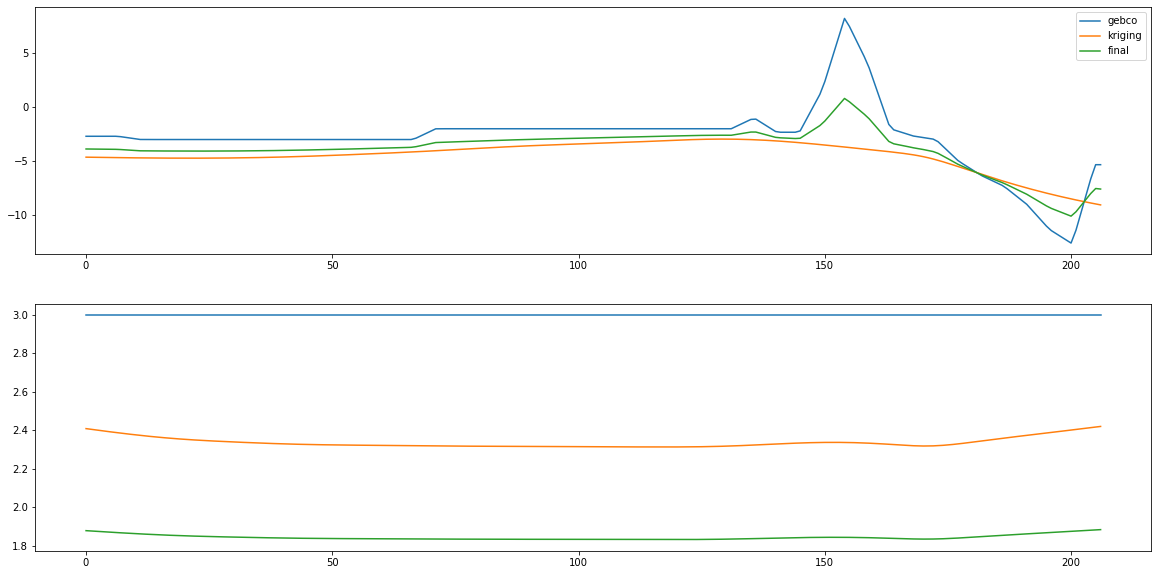

In [53]:
row = 100
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,10))
for grid in [gebco_depth,kriged_depth,updated_depth_grid,]:
    ax1.plot(grid[:,row])
for uncertaintygrid in [gebco_uncertainty,kriged_std,updated_uncertainty_grid]:
    ax2.plot(uncertaintygrid[:,row])
    
ax1.legend(['gebco','kriging','final'])